## 作業
### 用 digits (3個數字即可, dataset.load_digits(n_class=3)) 資料嘗試跑 PCA

## 參考資料

[Unsupervised learning - StatsLearning Lect12a 111113 - Statistical Learning YT](https://www.youtube.com/watch?v=ipyxSYXgzjQ)

[Further Principal Components - StatsLearning Lect12b 111113 - Statistical Learning YT](https://www.youtube.com/watch?v=dbuSGWCgdzw)

[Principal Components Regression - StatsLearning Lect8k 110913 - Statistical Learning YT](https://www.youtube.com/watch?v=eYxwWGJcOfw)

[Dimensionality Reduction | Principal Component Analysis Algorithm：Lecture 14.4 — \[Andrew Ng\]](https://www.youtube.com/watch?v=rng04VJxUt4)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn import decomposition

np.random.seed(5)
%matplotlib inline

In [2]:
digits = datasets.load_digits(n_class=3)
X = digits.data
y = digits.target
print('X:\n', X[:3])
print()
print('y:\n', y[:10])
print()
print('unique y:\n', np.unique(y))

X:
 [[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
  15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
   0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
   0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
 [ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.  0. 11. 16.  9.  0.  0.  0.  0.
   3. 15. 16.  6.  0.  0.  0.  7. 15. 16. 16.  2.  0.  0.  0.  0.  1. 16.
  16.  3.  0.  0.  0.  0.  1. 16. 16.  6.  0.  0.  0.  0.  1. 16. 16.  6.
   0.  0.  0.  0.  0. 11. 16. 10.  0.  0.]
 [ 0.  0.  0.  4. 15. 12.  0.  0.  0.  0.  3. 16. 15. 14.  0.  0.  0.  0.
   8. 13.  8. 16.  0.  0.  0.  0.  1.  6. 15. 11.  0.  0.  0.  1.  8. 13.
  15.  1.  0.  0.  0.  9. 16. 16.  5.  0.  0.  0.  0.  3. 13. 16. 16. 11.
   5.  0.  0.  0.  0.  3. 11. 16.  9.  0.]]

y:
 [0 1 2 0 1 2 0 1 2 0]

unique y:
 [0 1 2]


載入 相關套件 並 執行 PCA 實驗 ...

In [3]:
pca = decomposition.PCA(n_components=3)

In [4]:
def plot_digits_pca_decomposition(X, y, pca):
    X = pca.fit_transform(X)
    ax = Axes3D(plt.figure(figsize=(4, 3)), rect=[0, 0, .95, 1], elev=48, azim=134)
    for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
        ax.text3D(X[y == label, 0].mean(), X[y == label, 1].mean(), X[y == label, 2].mean() + 15, name,
                  horizontalalignment='center', bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=np.choose(y, [1, 2, 0]).astype(np.float), cmap=plt.cm.nipy_spectral, edgecolor='k')
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    plt.show()

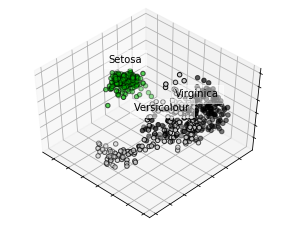

In [5]:
plot_digits_pca_decomposition(X, y, pca)